# Hopfield neural network for TSP problem

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Reference results

### utils

In [7]:
def distance(vector1, vector2):
    v1 = np.asarray(vector1)
    v2 = np.asarray(vector2)
    d = np.linalg.norm(v1-v2)
    return d

In [21]:
# compute the refferenced results
class DPSolution:
    def __init__(self, dis_mat, start_node):
        '''
        dis_mat: distance matrix
        start_node: the beginning node of the TSP
        '''
        self.dis_mat = dis_mat 
        self.start_node = start_node  
        # for recording the path
        self.node_array = [[0] * (2 ** (len(self.dis_mat) - 1)) for i in range(len(self.dis_mat))]
        # for recording the distance
        self.d_array = [[0] * (2 ** (len(self.dis_mat) - 1)) for i in range(len(self.dis_mat))]
        
    def sets2num(self, sets):
        su = 0
        for s in sets:
            su = su + 2 ** (s - 1)  
        return su

    def tsp_solve(self):
        s = self.start_node
        num = len(self.dis_mat)
        cities = list(range(num))
        # cities should contain all the cities that have not been met
        cities.pop(cities.index(s)) 
        start_node = s 
        return self.solve(start_node, cities) 

    def solve(self, node, future_sets):
        # using recursion to solve the tsp
        if len(future_sets) == 0:
            # stop criterion if there are no cities
            return self.dis_mat[node][self.start_node]
        c = self.sets2num(future_sets)
        if self.d_array[node][c] > 0:
            return self.d_array[node][c]

        distance = []
        # for every unmet city
        for i in range(len(future_sets)):
            s_i = future_sets[i]
            copy = future_sets[:]
            copy.pop(i)
            distance.append(self.dis_mat[node][s_i] + self.solve(s_i, copy))

        d = min(distance)
        next_one = future_sets[distance.index(d)]

        # record the path
        self.node_array[node][c] = next_one
        # record the distance of child problem
        self.d_array[node][c] = d
        return d



### for problem

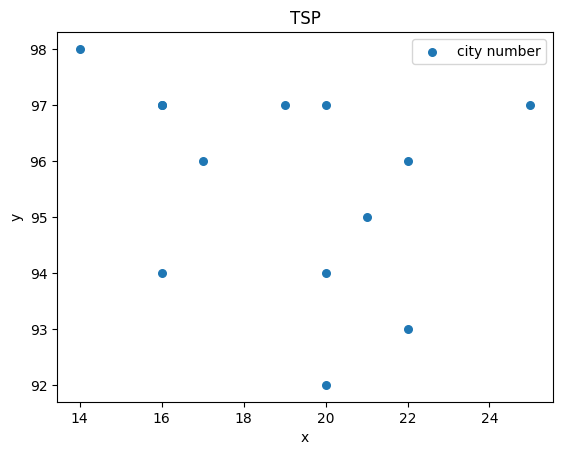

In [5]:
n = 13
# random_list = list(itertools.product(range(1, n), range(1, n)))
random_list = [(16, 94), (20, 92), (22, 93), (25, 97), (22, 96), (20, 97), (17, 96), (16, 97), (14, 98), (16, 97),
               (21, 95), (19, 97), (20, 94)]
# random_list = [(16, 94), (20, 92), (22, 93), (25, 97), (22, 96), (20, 97), (17, 96), (16, 97)]
cities = random.sample(random_list, n)

x = []
y = []
for city in cities:
    x.append(city[0])
    y.append(city[1])

fig = plt.figure()
plt.scatter(x, y, label='city number', s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('TSP')

plt.legend()
plt.show()

In [8]:
# distance
distence_matrix = np.zeros([n, n])
for i in range(0, n):
    for j in range(n):
        distence = distance(cities[i], cities[j])
        distence_matrix[i][j] = distence

distence_matrix = np.zeros([n, n])
for i in range(0, n):
    for j in range(n):
        distence = distance(cities[i], cities[j])
        distence_matrix[i][j] = distence


最短距离：31.293462167285984
0 ---> 6
6 ---> 3
3 ---> 9
9 ---> 1
1 ---> 11
11 ---> 5
5 ---> 4
4 ---> 2
2 ---> 7
7 ---> 8
8 ---> 10
10 ---> 12
12 ---> 0


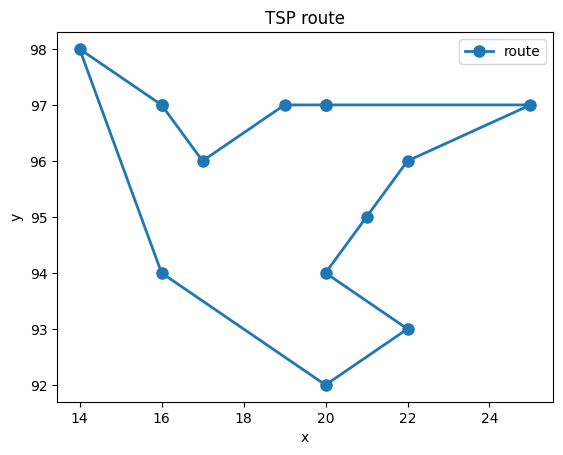

In [22]:
S = DPSolution(distence_matrix, 0)
print("最短距离：" + str(S.tsp_solve()))
# 开始回溯
M = S.node_array
lists = list(range(len(S.dis_mat)))
start = S.start_node
city_order = []
while len(lists) > 0:
    lists.pop(lists.index(start))
    m = S.sets2num(lists)
    next_node = S.node_array[start][m]
    print(start, "--->", next_node)
    city_order.append(cities[start])
    start = next_node

# result
x1 = []
y1 = []
for city in city_order:
    x1.append(city[0])
    y1.append(city[1])

x2 = []
y2 = []
x2.append(city_order[-1][0])
x2.append(city_order[0][0])
y2.append(city_order[-1][1])
y2.append(city_order[0][1])

x = x1 + [x2[-1]]
y = y1 + [y2[-1]]
plt.plot(x,y,label='route',linewidth=2,marker='o',markersize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('TSP route')
plt.legend()
plt.show()


## Hopfield Neural Network

In [23]:
# price function:
def price_cn(vec1, vec2):
    return np.linalg.norm(np.array(vec1) - np.array(vec2))
# calculate the total distance of a path
def calc_distance(path):
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i+1]]
    return dis
# distance between cities
def get_distance(citys):
    N = len(citys)
    distance = np.zeros((N, N))
    for i, curr_point in enumerate(citys):
        line = []
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in enumerate(citys)]
        distance[i] = line
    return distance

In [24]:
def calc_du(V, distance):
    a = np.sum(V, axis=0) - 1  # 按列相加
    b = np.sum(V, axis=1) - 1  # 按行相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
    for i in range(N):
        for j in range(N):
            t2[j, i] = b[j]
    c_1 = V[:, 1:N]
    c_0 = np.zeros((N, 1))
    c_0[:, 0] = V[:, 0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.dot(distance, c)
    return -A * (t1 + t2) - D * c

In [25]:

def calc_U(U, du, step):
    return U + du * step

def calc_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))

def calc_energy(V, distance):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e

In [26]:
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV

In [34]:
def draw_H_and_E(citys, H_path, energys):
    fig = plt.figure(figsize=(16, 7))
    # plot Hamiltonian
    ax1 = fig.add_subplot(121)
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='red')
        p2 = plt.Circle(citys[to_], 0.2, color='red')
        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='red')
        ax1.annotate(text=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()
    # plot energy
    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(0, len(energys), 1), energys, color='red')
    plt.show()

### train

In [36]:
citys = np.array([(16, 94), (20, 92), (22, 93), (25, 97), (22, 96), (20, 97), (17, 96), (16, 97), (14, 98), (16, 97),
            (21, 95), (19, 97), (20, 94)])
# 先得到相对距离矩阵
distance = get_distance(citys)
N = len(citys)
# 设置初始值
A = N * N
D = N / 2
U0 = 0.0009  # 初始电压
step = 0.0001  # 步长
num_iter = 10000  # 迭代次数
# 初始化输入U
U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)
# 初始化输出V
V = calc_V(U, U0)
# 记录每次迭代后的能量函数值
energys = np.array([0.0 for x in range(num_iter)])
best_distance = np.inf  # 最优距离
best_route = []  # 最优路线
H_path = []  # 哈密顿回路
# 开始迭代训练网络
for n in range(num_iter):
    # 利用动态方程计算du
    du = calc_du(V, distance)
    # 由一阶欧拉法更新下一个时间的输入状态（电路的输入电压U）
    U = calc_U(U, du, step)
    # 由sigmoid函数更新下一个时间的输出状态（电路的输出电压V）
    V = calc_V(U, U0)
    # 计算当前网络的能量E
    energys[n] = calc_energy(V, distance)
    # 检查路径的合法性
    route, newV = check_path(V)
    if len(np.unique(route)) == N:
        route.append(route[0])
        dis = calc_distance(route)
        if dis < best_distance:
            H_path = []
            best_distance = dis
            best_route = route
            [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
            print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
            [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]


第106次迭代找到的次优解距离为：44.16025202539497，能量为：849.0829967976399，路径为：
m,a,c,g,i,j,h,l,k,e,d,f,b,m
第301次迭代找到的次优解距离为：38.80143608554924，能量为：675.2462933281406，路径为：
m,c,a,g,i,j,h,l,k,e,d,f,b,m
第692次迭代找到的次优解距离为：38.4136853595328，能量为：1145.901739618669，路径为：
l,a,i,j,h,g,e,k,f,d,c,b,m,l
第754次迭代找到的次优解距离为：35.79616307249605，能量为：1260.6368570556028，路径为：
l,a,i,j,h,g,f,k,d,e,c,b,m,l
第1639次迭代找到的次优解距离为：31.701103020039582，能量为：689.8975221398573，路径为：
i,j,h,g,l,f,e,d,k,c,b,m,a,i
第2695次迭代找到的次优解距离为：31.40711264991331，能量为：812.0814246226516，路径为：
h,j,g,l,f,d,e,k,c,b,m,a,i,h


### Visualize

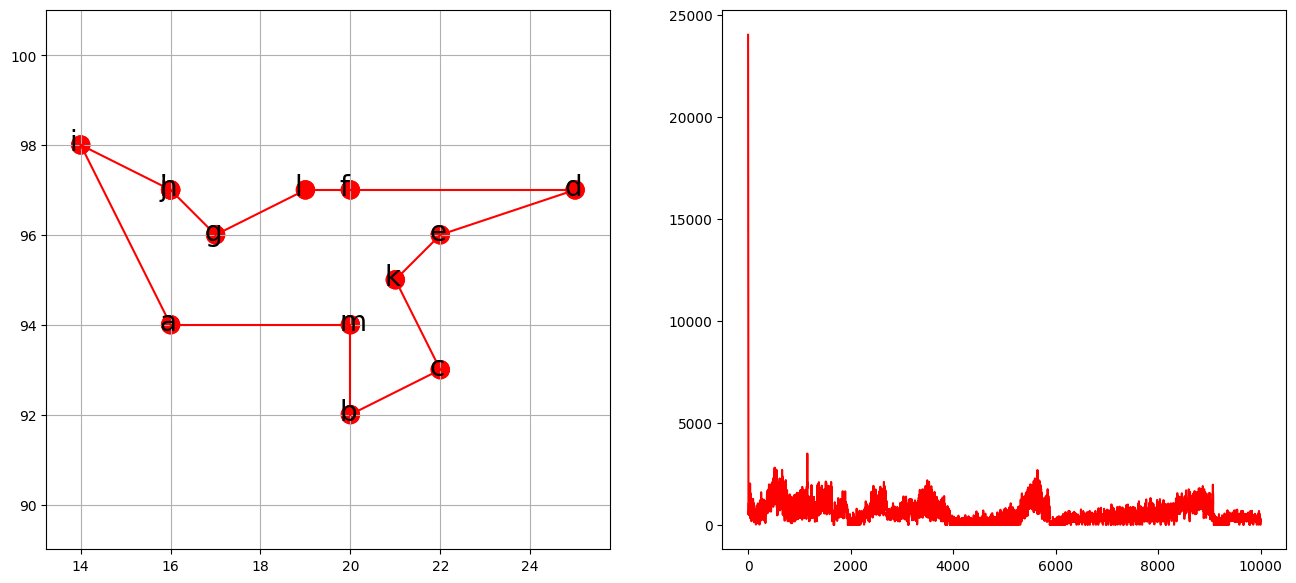

In [37]:
if len(H_path) > 0:
    draw_H_and_E(citys, H_path, energys)
else:
    print('没有找到最优解')